In [4]:
import pandas as pd
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 350)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
rcParams.update({'figure.autolayout': True})

# other module need:
# pip install pdpbox
# pip install graphviz


## Descriptive Stats ##

In [5]:
data = pd.read_csv("/Users/ellaquan/Downloads/Conversion Rate/conversion_project.csv")
print(data.head())

  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [7]:
print(data.groupby(['country']).size())

country
China       76602
Germany     13056
UK          48450
US         178092
dtype: int64


In [8]:
print(data.groupby(['source']).size())

source
Ads        88740
Direct     72420
Seo       155040
dtype: int64


In [9]:
# check the outliers
print(data[data['age']>110])

        country  age  new_user source  total_pages_visited  converted
90928   Germany  123         0    Seo                   15          1
295581       UK  111         0    Ads                   10          1


In [10]:
data = data[data['age']<110]

Check the Segments with low conversion rate and get a sense of the data

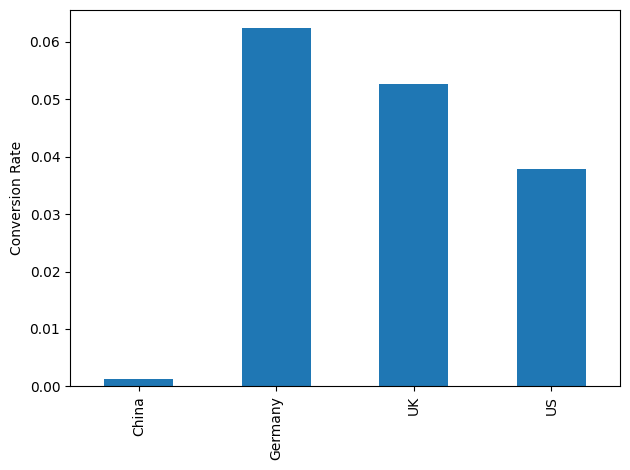

In [11]:
import matplotlib.pyplot as plt

cty = data.groupby('country')['converted'].mean().plot.bar()
cty.set_ylabel("Conversion Rate")        
cty.set_xlabel("")                       
plt.tight_layout()                      
plt.show()


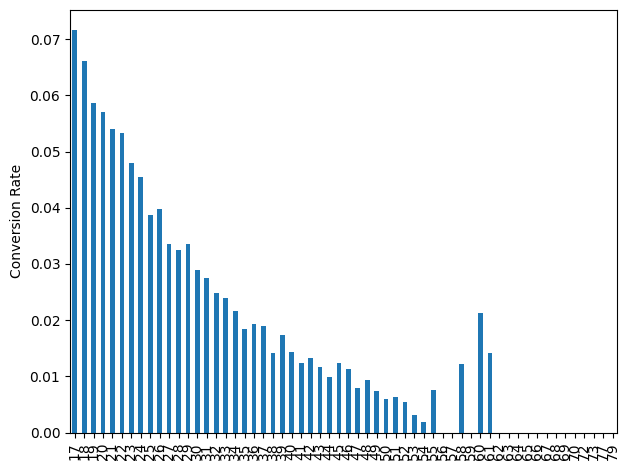

In [12]:
age_bin=data.groupby(['age'])['converted'].mean().plot.bar()
age_bin.set_ylabel("Conversion Rate")        
age_bin.set_xlabel("")                       
plt.tight_layout()                      
plt.show()


(array([4.0739e+04, 4.3868e+04, 0.0000e+00, 4.3829e+04, 0.0000e+00,
        4.1046e+04, 0.0000e+00, 3.6308e+04, 3.0261e+04, 0.0000e+00,
        2.3488e+04, 0.0000e+00, 1.7522e+04, 0.0000e+00, 1.2157e+04,
        0.0000e+00, 8.0730e+03, 5.3940e+03, 0.0000e+00, 3.6150e+03,
        0.0000e+00, 2.4250e+03, 0.0000e+00, 1.8110e+03, 1.3240e+03,
        0.0000e+00, 1.1000e+03, 0.0000e+00, 8.4500e+02, 0.0000e+00,
        7.2200e+02, 0.0000e+00, 5.6500e+02, 4.0500e+02, 0.0000e+00,
        2.9600e+02, 0.0000e+00, 1.8000e+02, 0.0000e+00, 1.1300e+02,
        0.0000e+00, 4.6000e+01, 3.9000e+01, 0.0000e+00, 1.7000e+01,
        0.0000e+00, 7.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 1.  ,  1.56,  2.12,  2.68,  3.24,  3.8 ,  4.36,  4.92,  5.48,
         6.04,  6.6 ,  7.16,  7.72,  8.28,  8.84,  9.4 ,  9.96, 10.52,
        11.08, 11.64, 12.2 , 12.76, 13.32, 13.88, 14.44, 15.  , 15.56,
        16.12, 16.68, 17.24, 17.8 , 18.36, 18.92, 19.48, 20.04, 20.6 ,
        21.16, 21.72, 22.28, 22.84

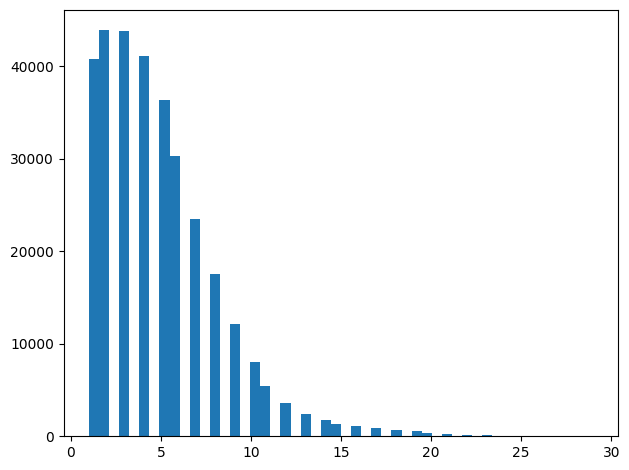

In [13]:
plt.hist(data['total_pages_visited'],bins=50)

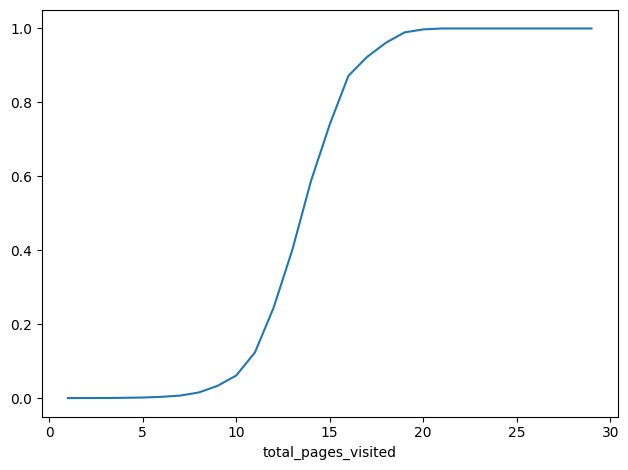

In [14]:
data.groupby(['total_pages_visited'])['converted'].mean().plot()
plt.show()

In [15]:
data.corr(numeric_only=True)

,age,new_user,total_pages_visited,converted
age,1.000000,0.012445,-0.046093,-0.089199
new_user,0.012445,1.000000,-0.082522,-0.152338
total_pages_visited,-0.046093,-0.082522,1.000000,0.528975
converted,-0.089199,-0.152338,0.528975,1.000000


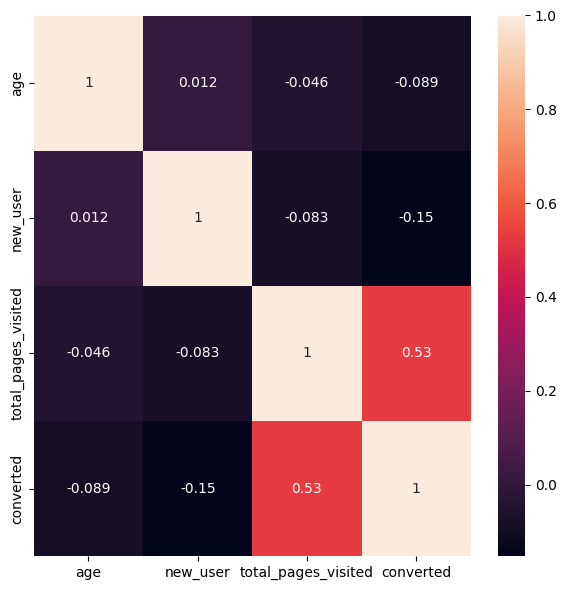

In [16]:
ax = plt.figure(figsize=(6,6))
ax = sns.heatmap(data.corr(numeric_only=True), annot=True)
